In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [282]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [283]:
df = pd.read_csv("../resources/data/discords/ECG/mitdbx_mitdbx_108.txt",header=None,names=['col0','col1','col2'],sep="  ")

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [284]:
df.drop('col0', axis=1, inplace=True)
df.drop('col2', axis=1, inplace=True)

In [285]:
df.head()

col1
0  4.995
1  4.995
2  4.995
3  4.995
4  4.995

In [286]:

print df.shape

(21600, 1)


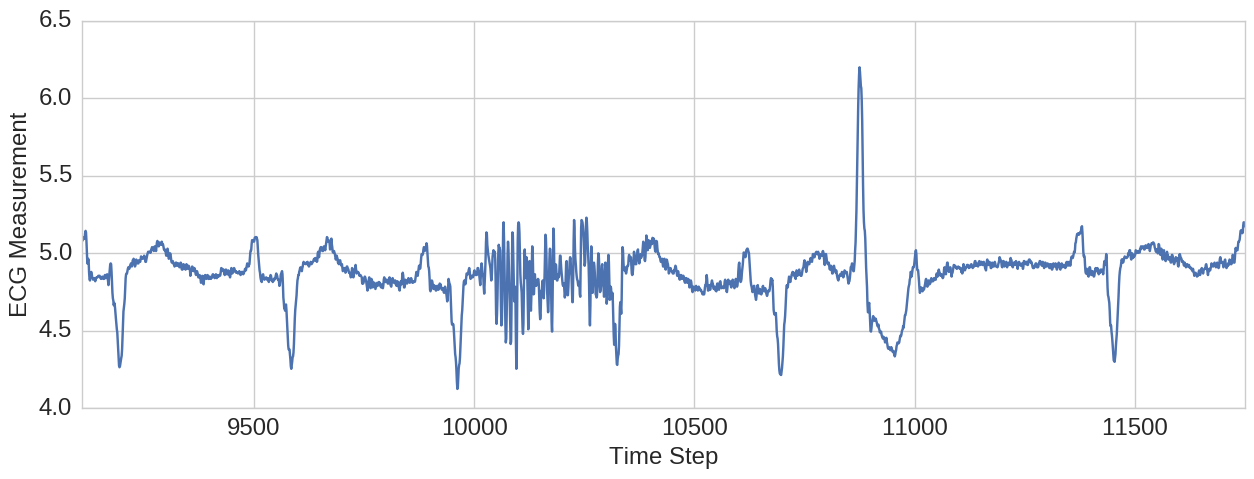

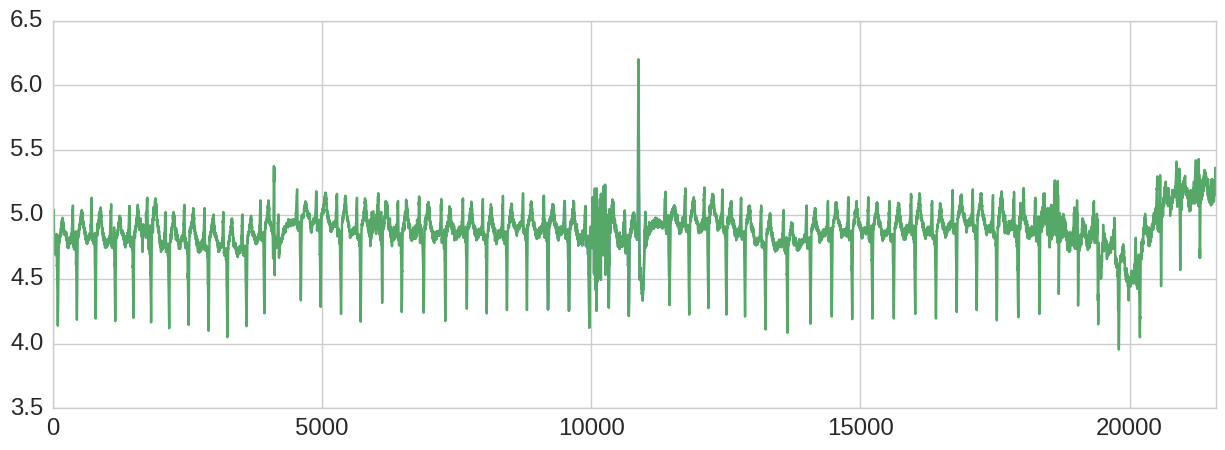

In [287]:
df['col1'].plot()
plt.show()

In [288]:
fig = plt.figure(figsize=(15,5))
df['col1'][0:1500].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
pp = PdfPages("ECG_normal.pdf")
pp.savefig(fig)
pp.close()

In [289]:
#isolate anomaly1
fig1 = plt.figure(figsize=(15,5))
df['col1'][3160:5270].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
pp = PdfPages("ECG_anomaly1.pdf")
pp.savefig(fig1)
pp.close()

In [290]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df['col1'][9110:11750].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
pp = PdfPages("ECG_anomaly2.pdf")
pp.savefig(fig2)
pp.close()

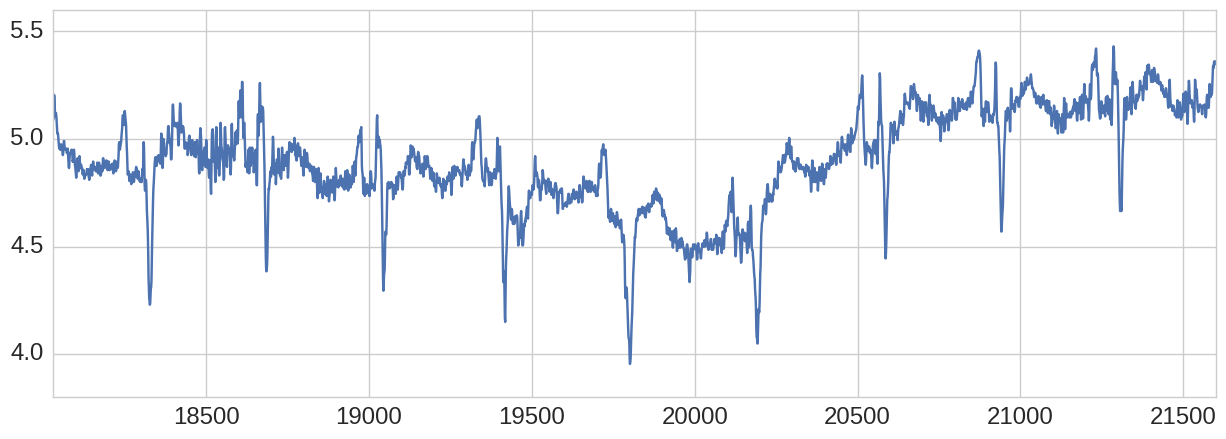

In [125]:
#isolate end sequence
df['col1'][18030:].plot()
plt.show()

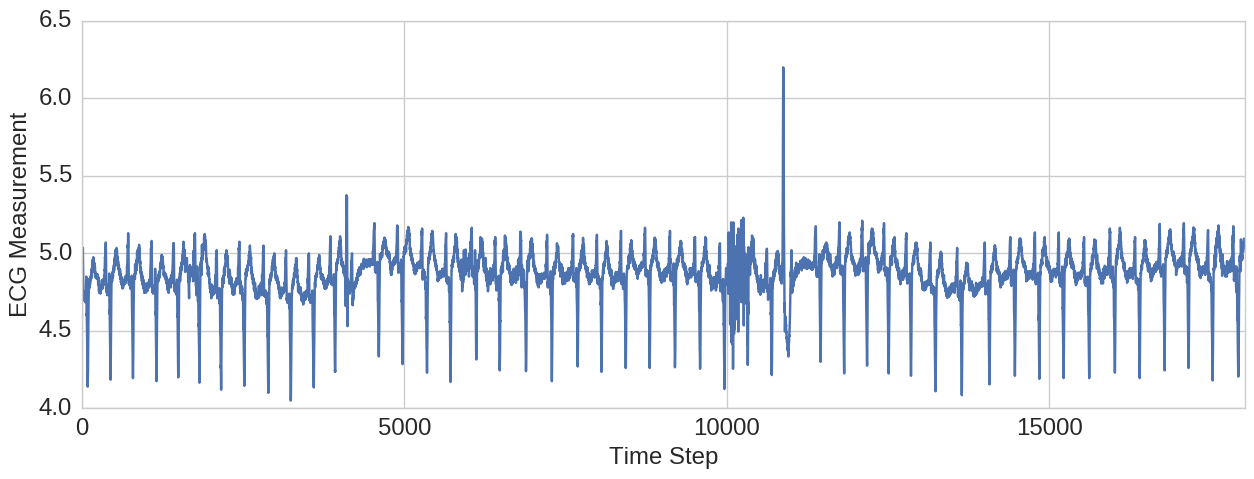

In [232]:
df = df[:18030]['col1']
df.plot()
plt.show()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
pp = PdfPages("ECG_data.pdf")
pp.savefig(f)
pp.close()

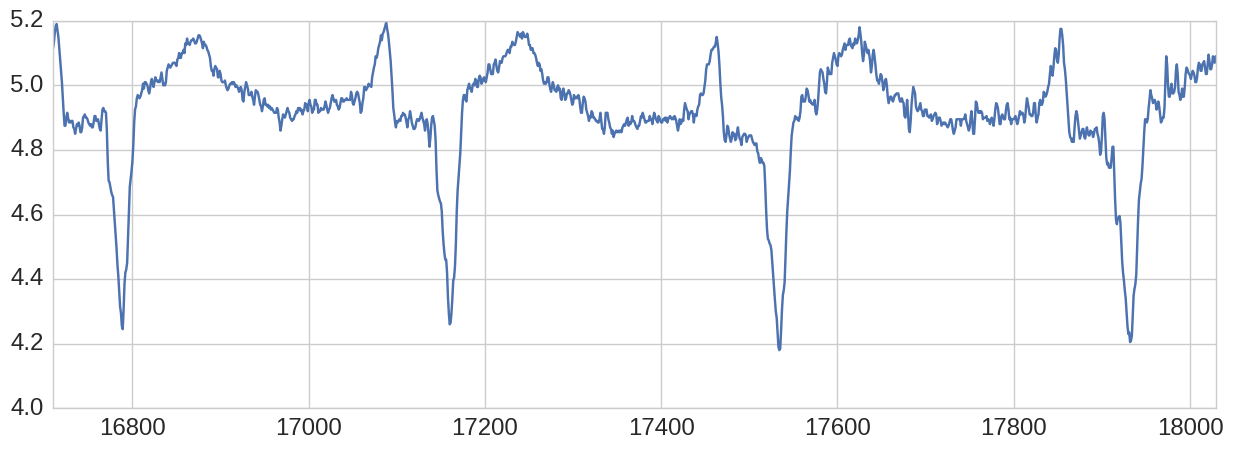

In [135]:
#isolate v1 sequence 
df['col1'][16710:].plot() 
plt.show()

#isolate v1 sequence
df['col1'][16710:].plot()
plt.show()

In [68]:
df['anomaly'] = 0
df.head()

col1  anomaly
0  4.995        0
1  4.995        0
2  4.995        0
3  4.995        0
4  4.995        0

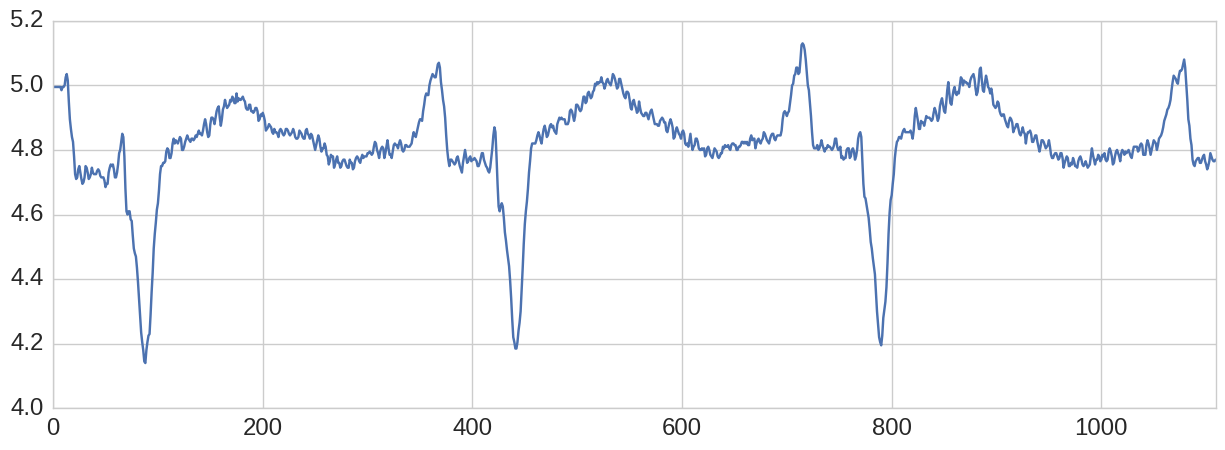

In [75]:
df['col1'][370*0:370*3].plot()
plt.show()

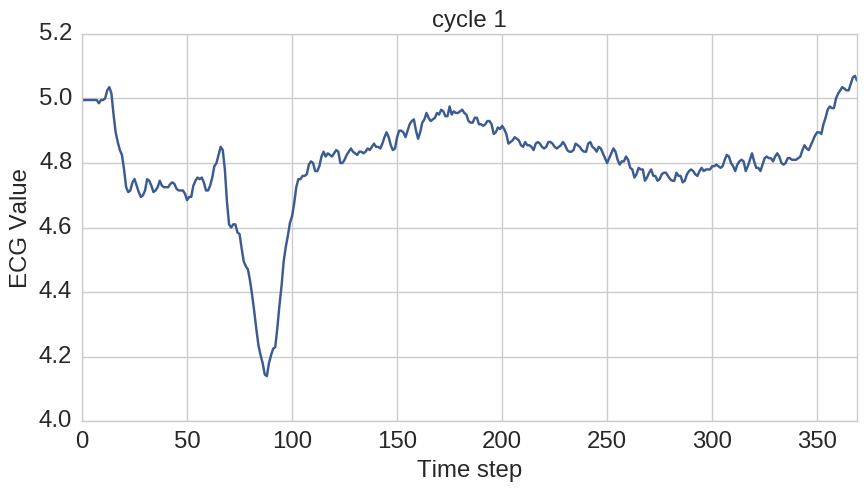

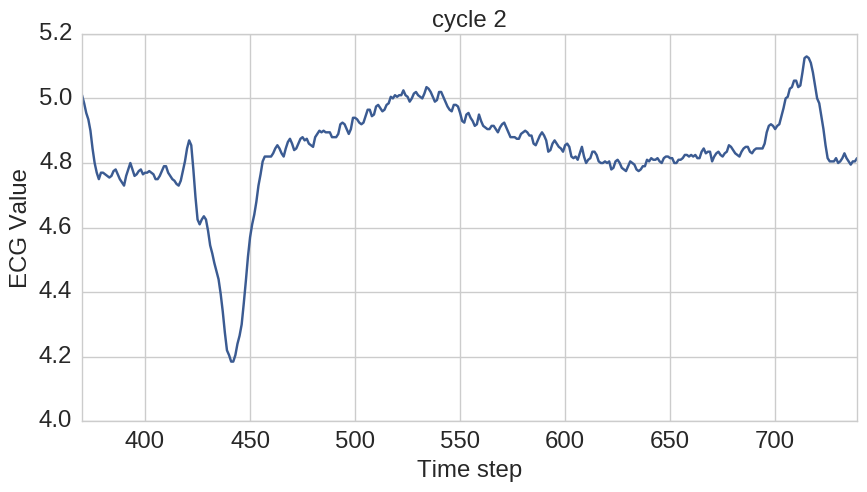

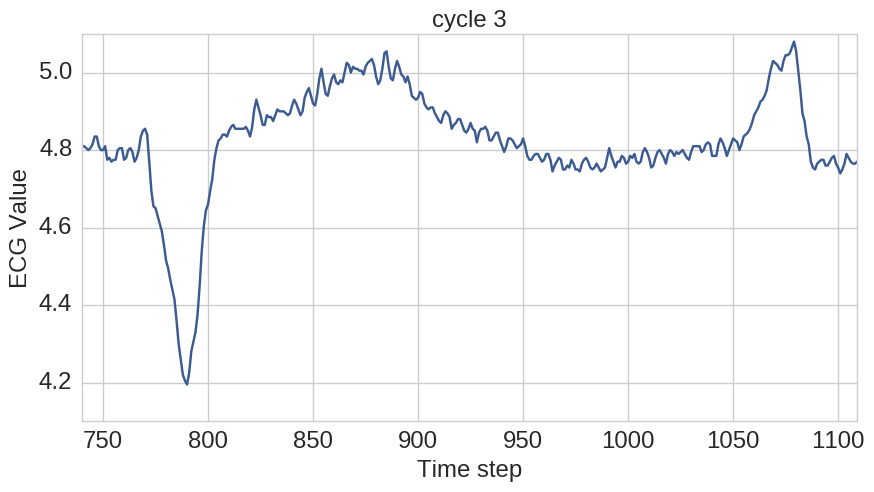

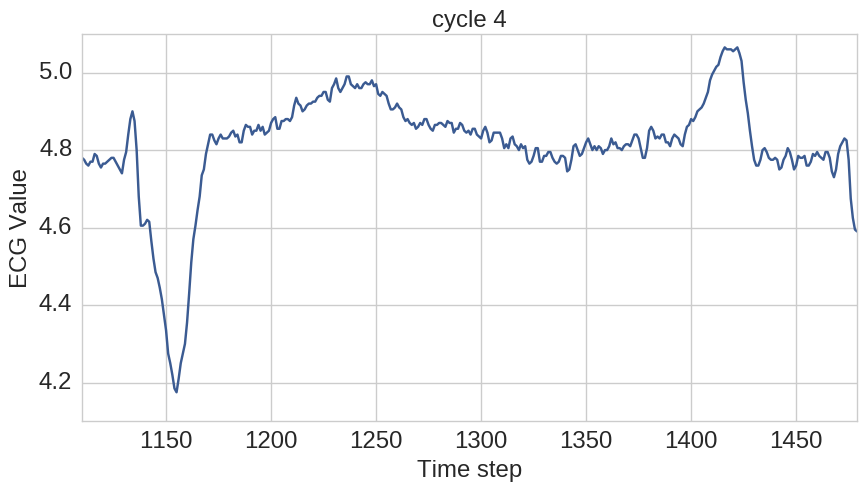

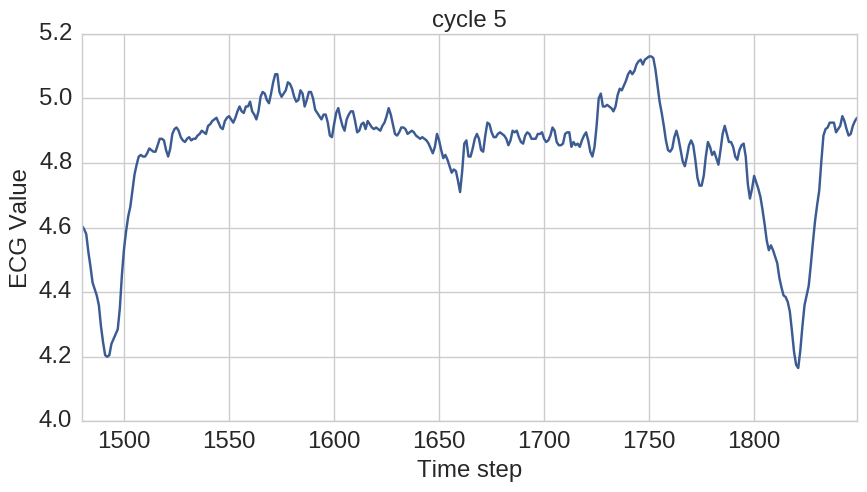

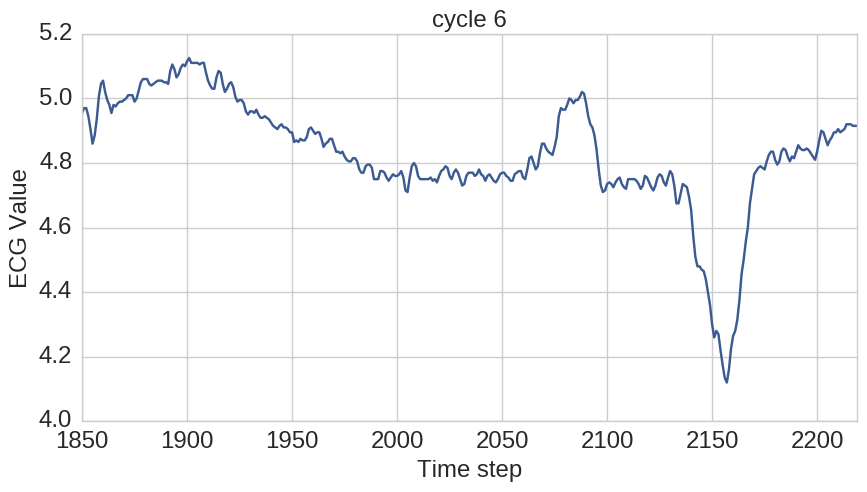

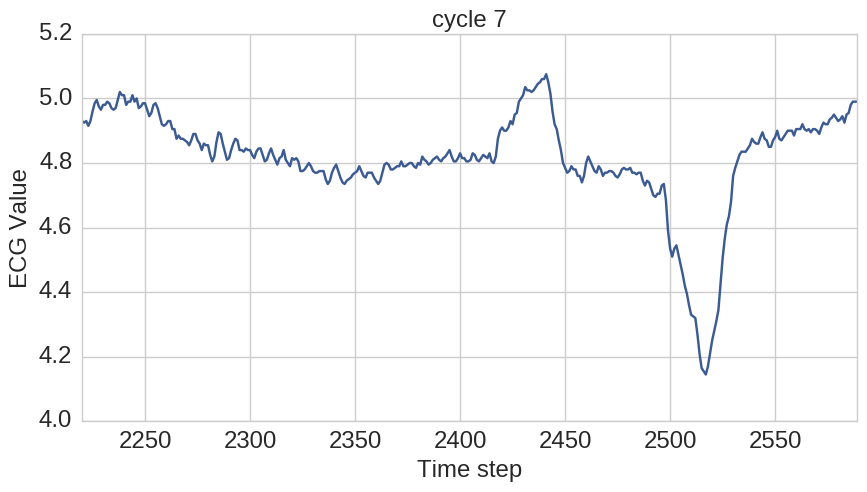

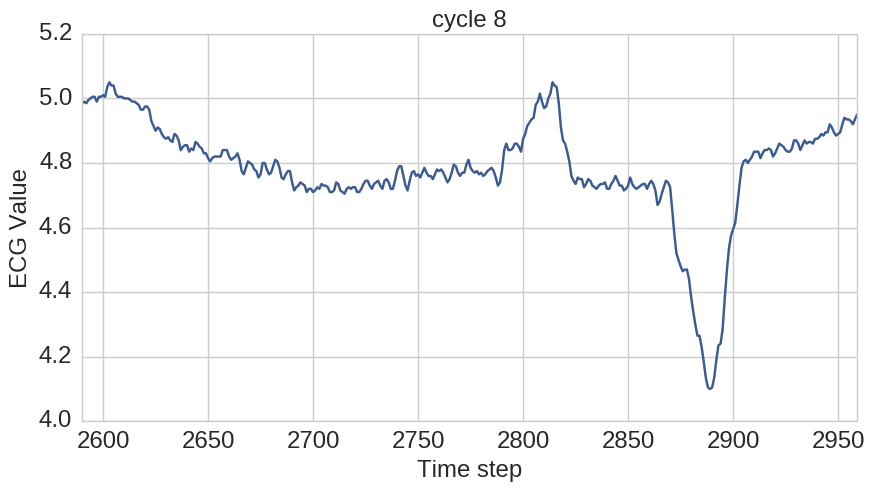

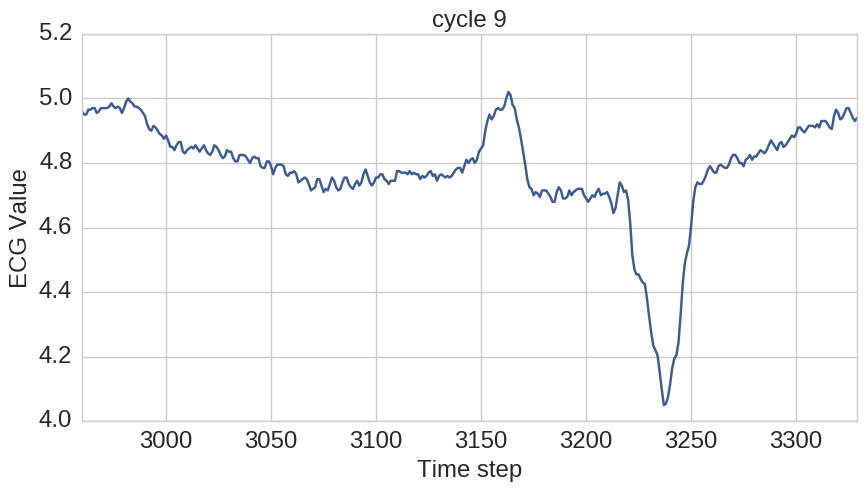

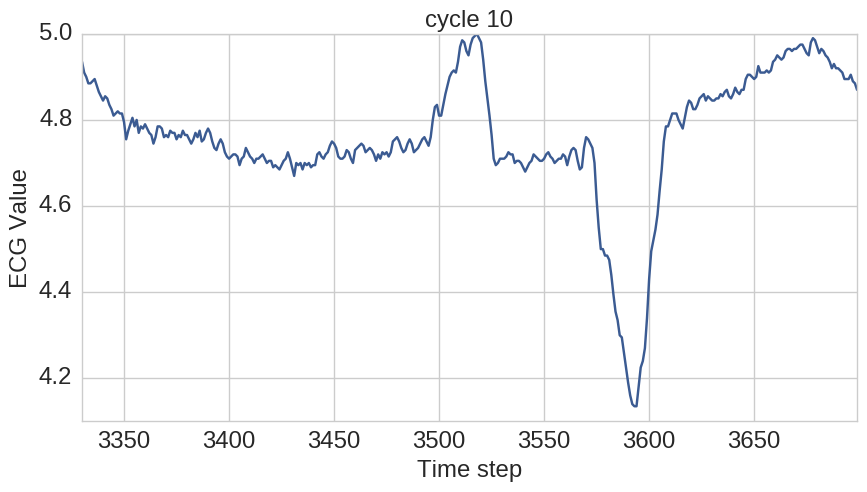

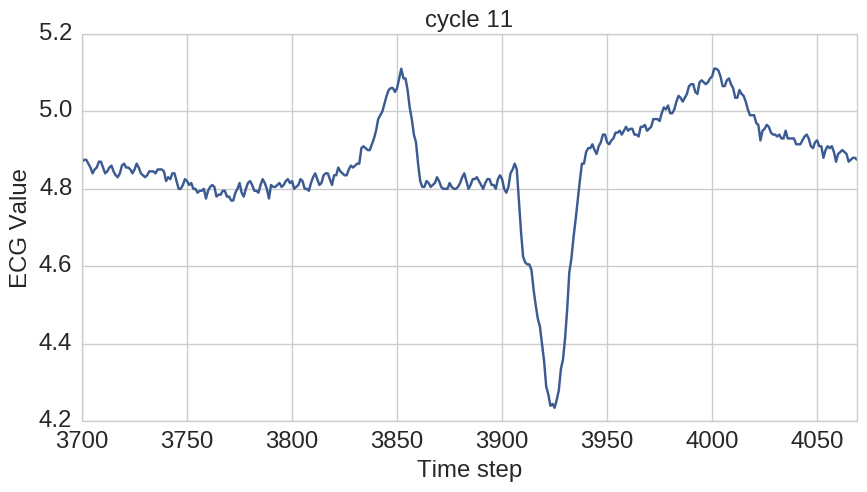

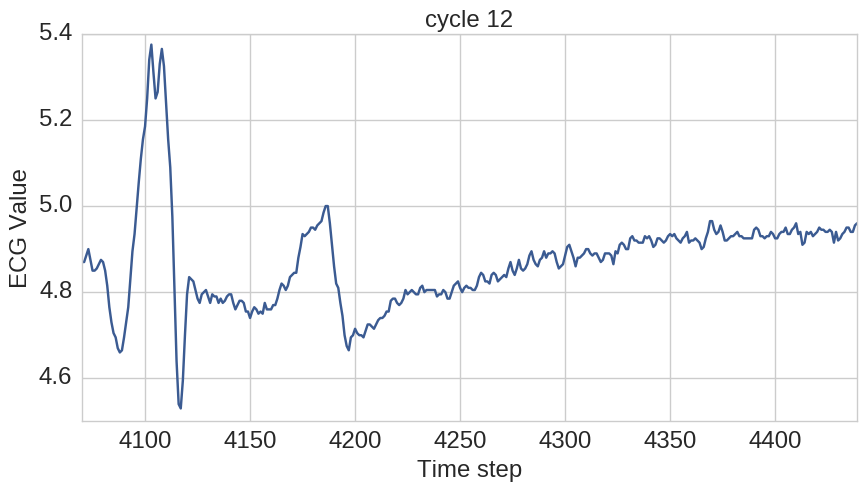

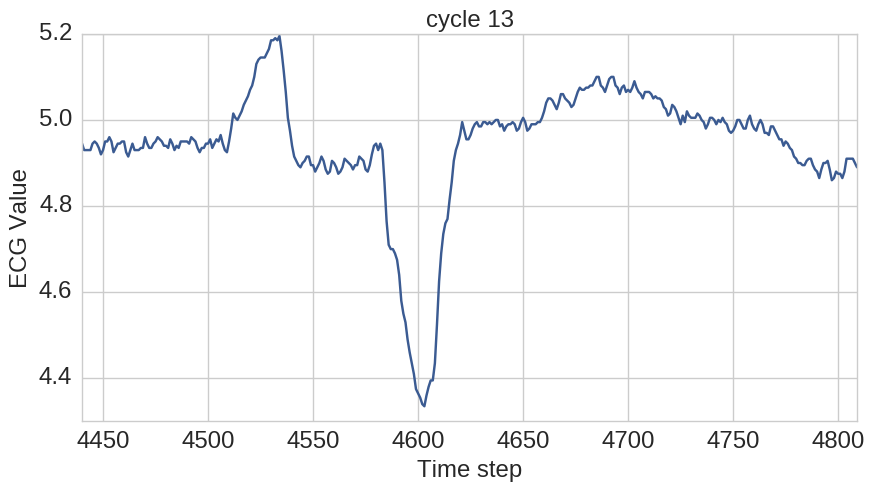

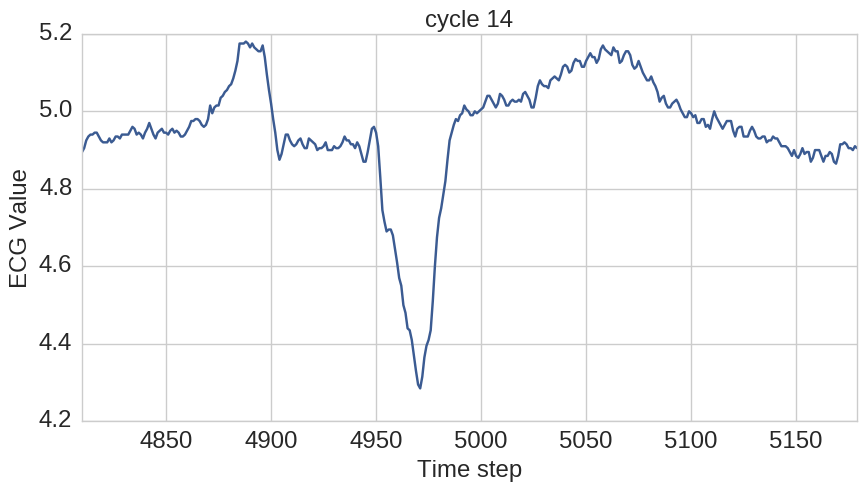

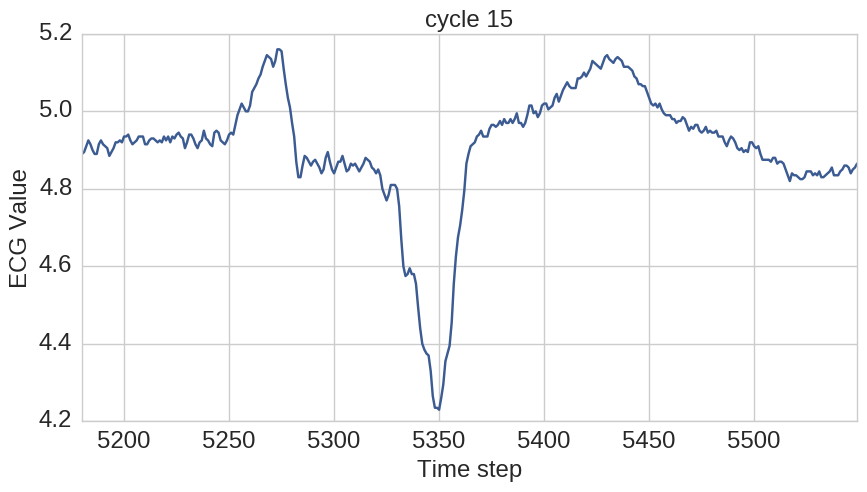

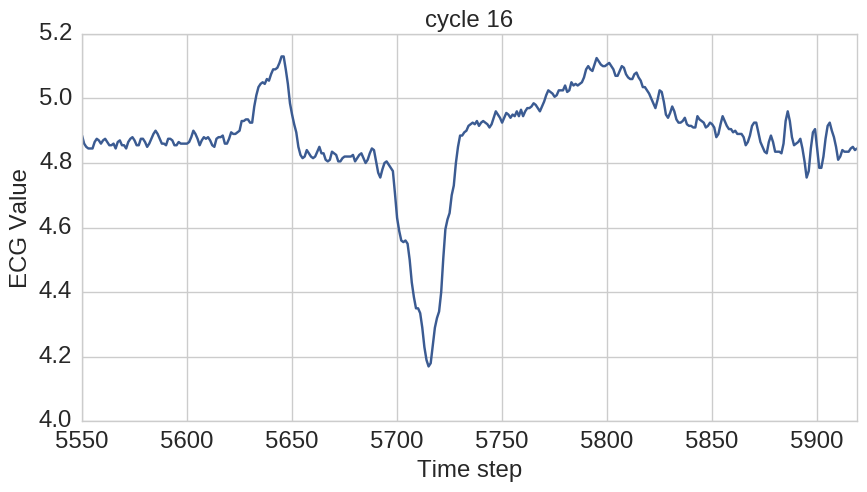

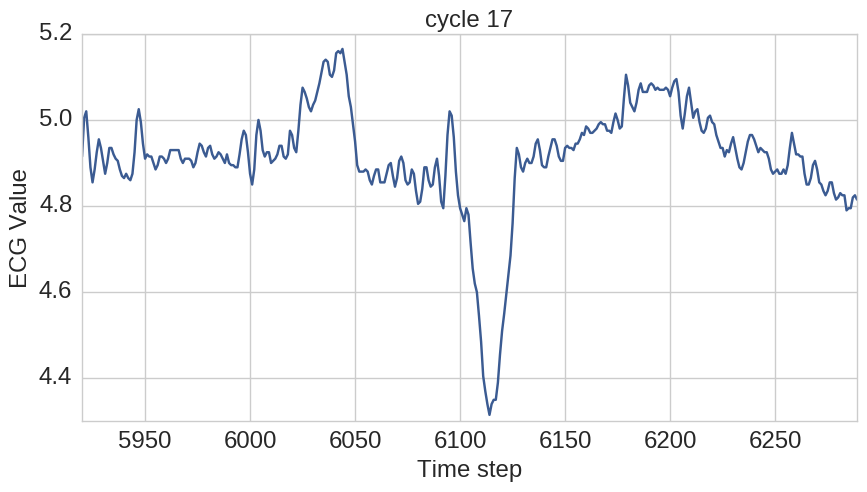

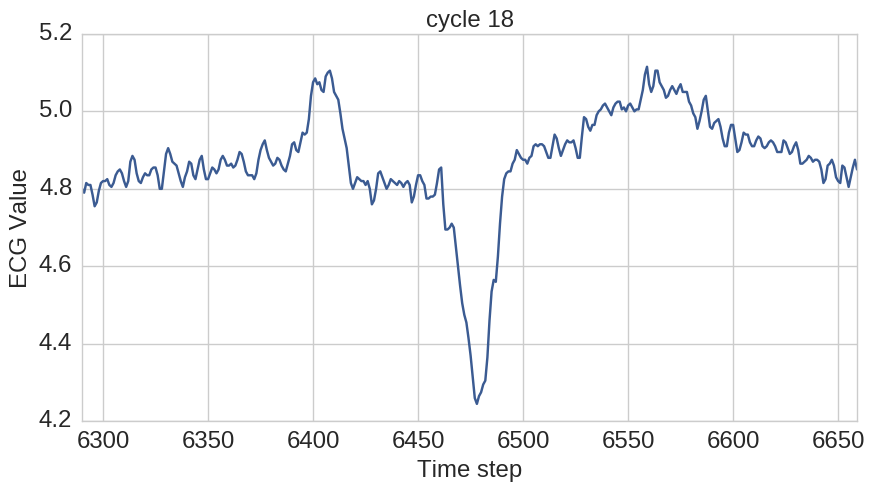

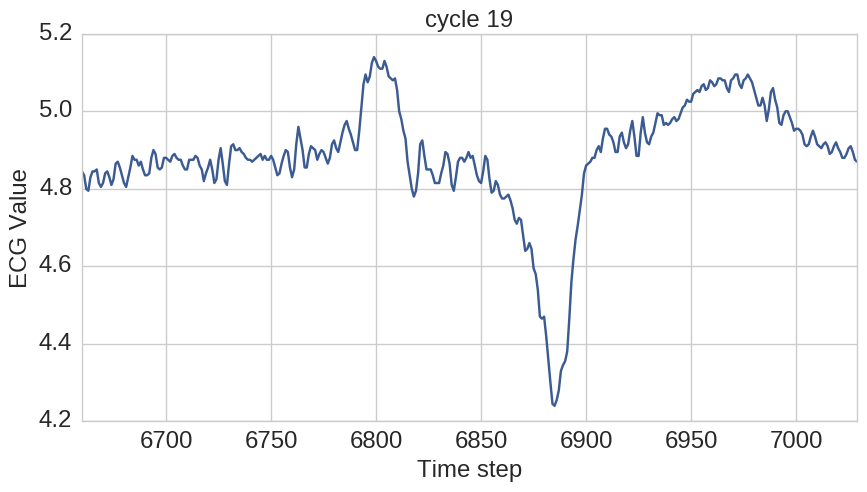

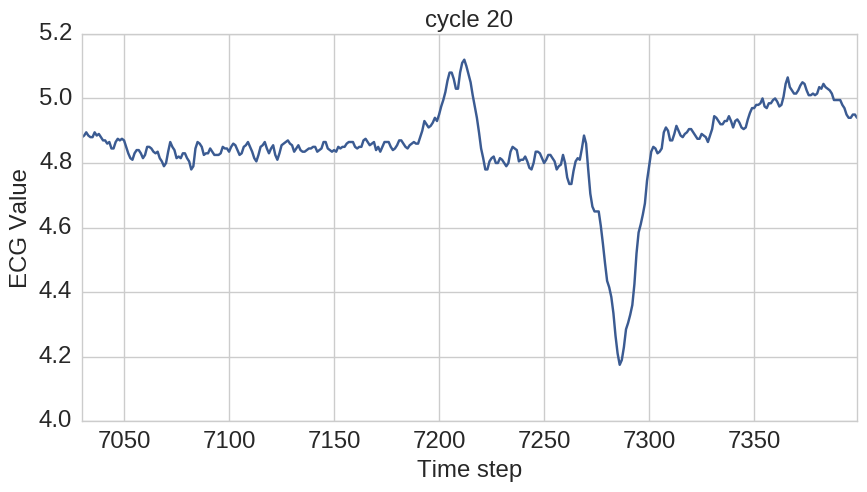

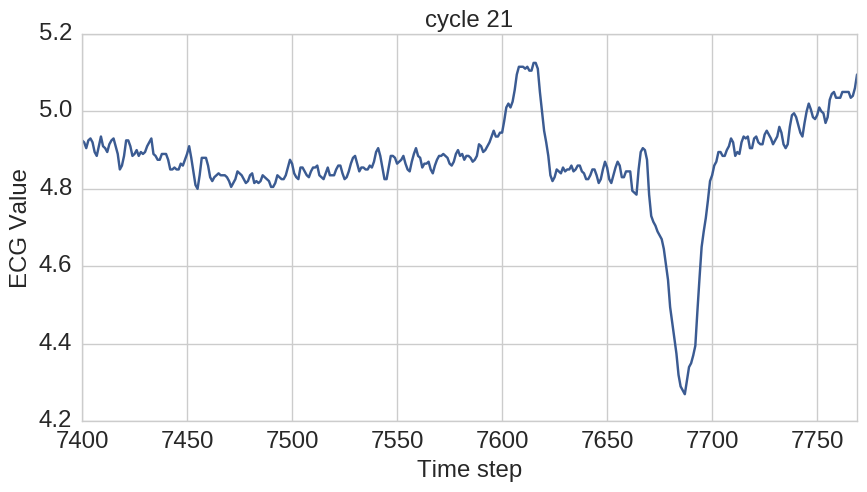

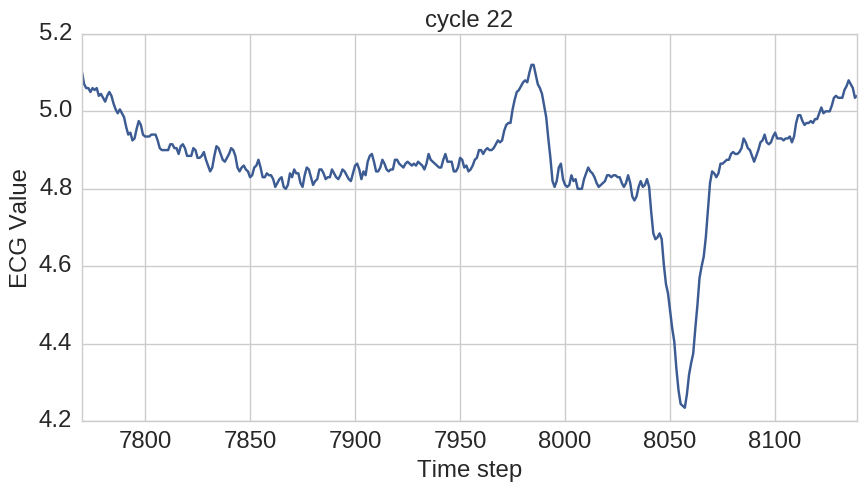

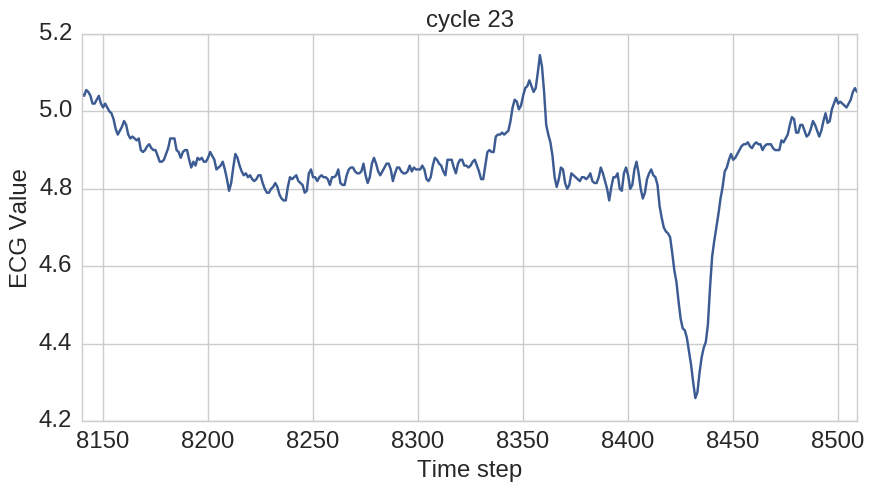

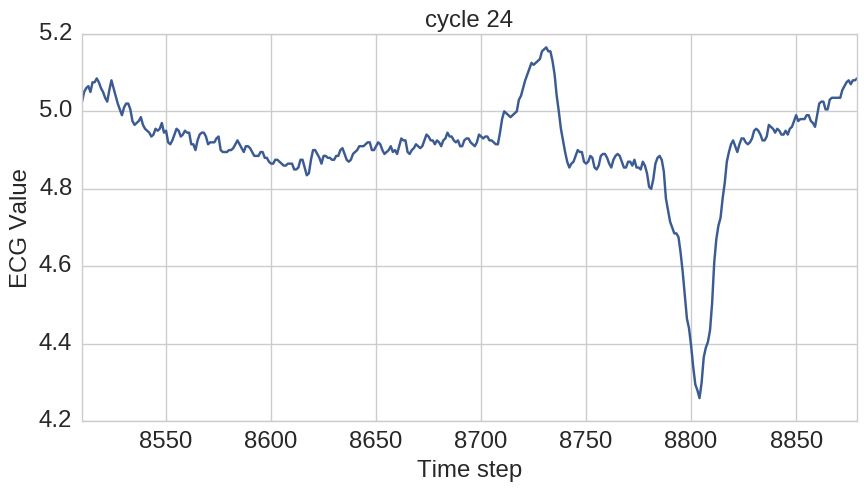

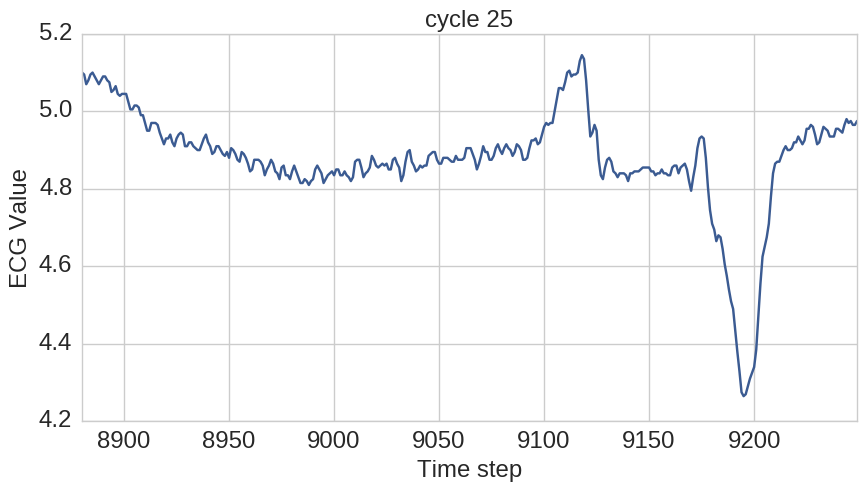

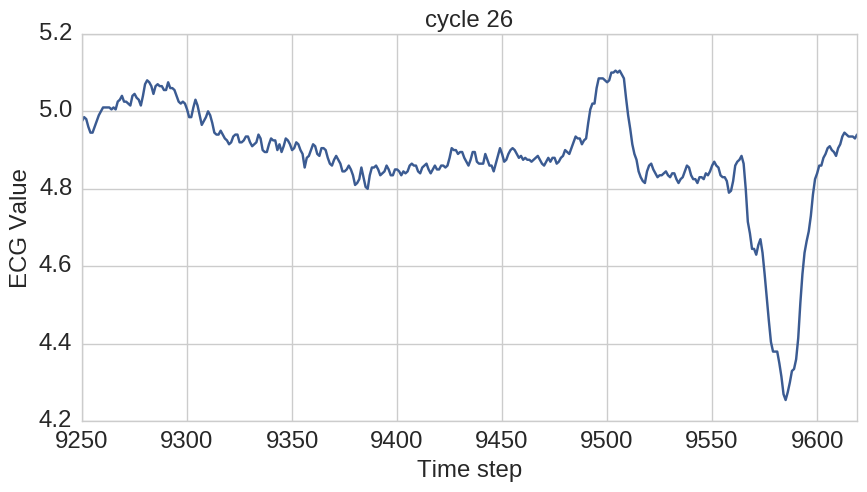

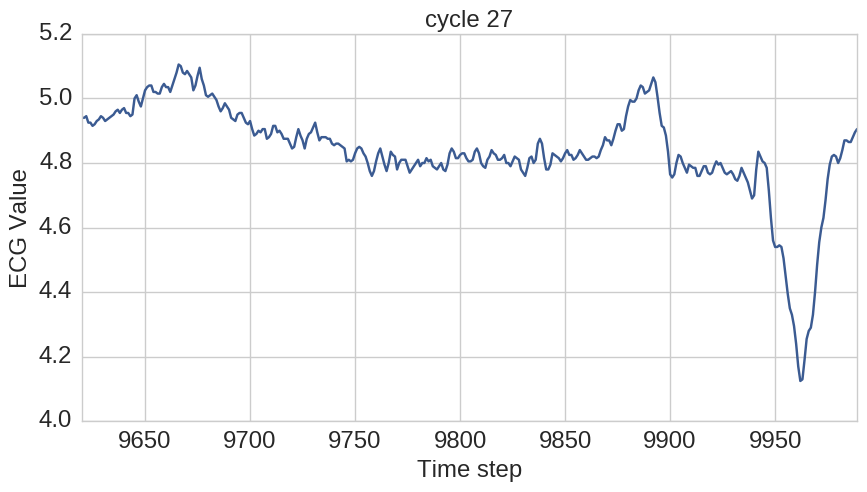

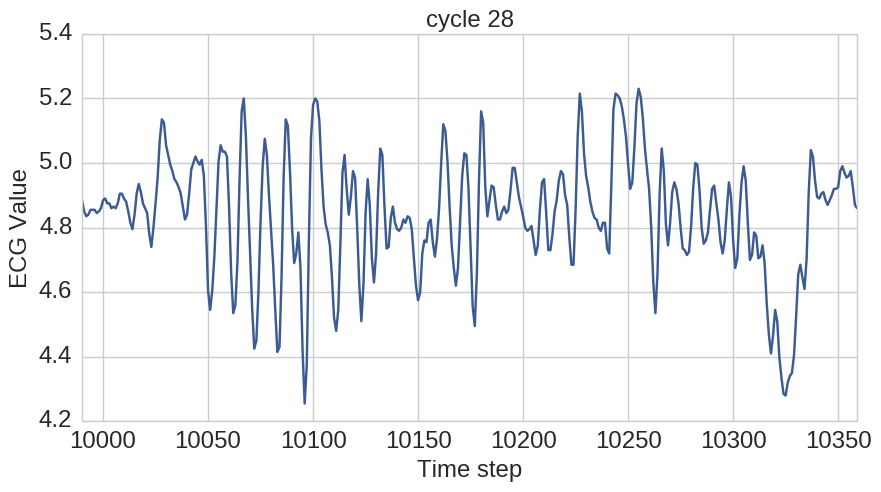

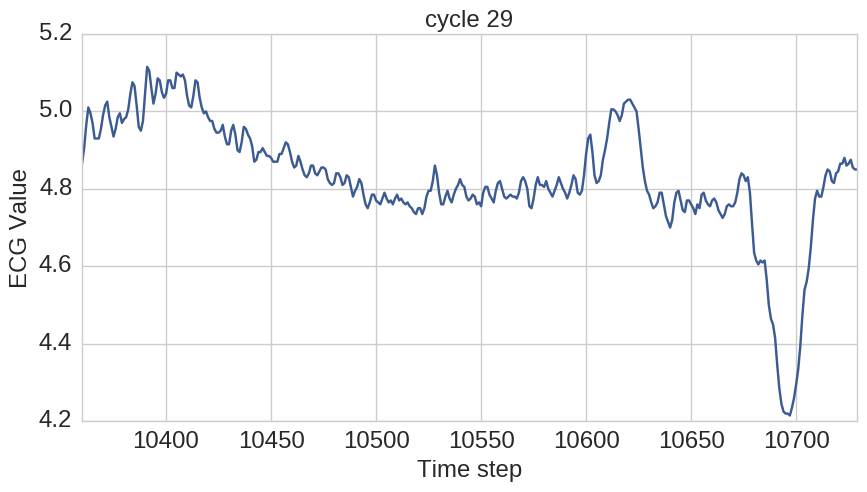

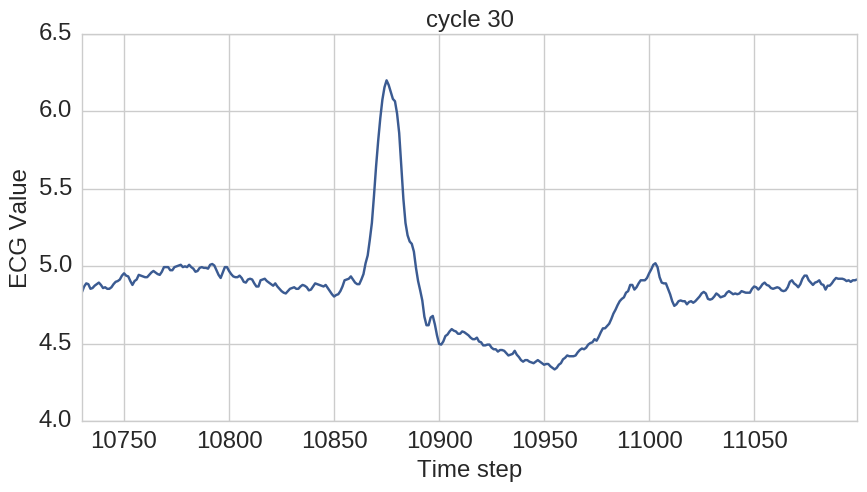

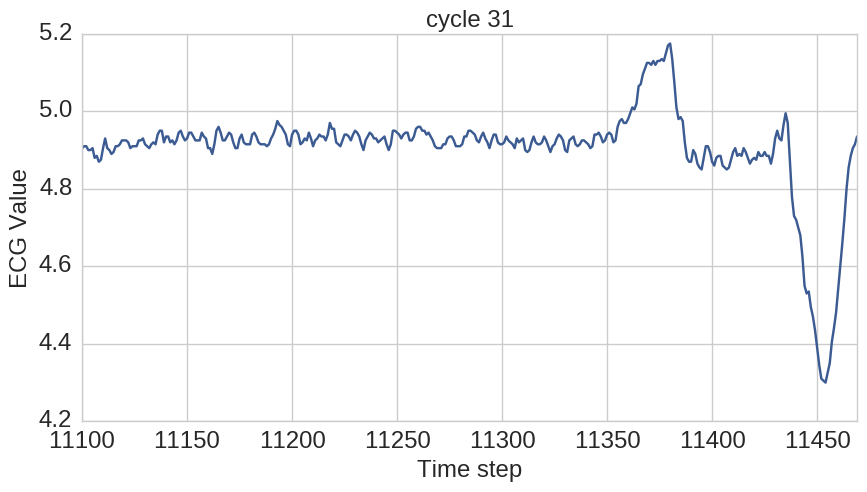

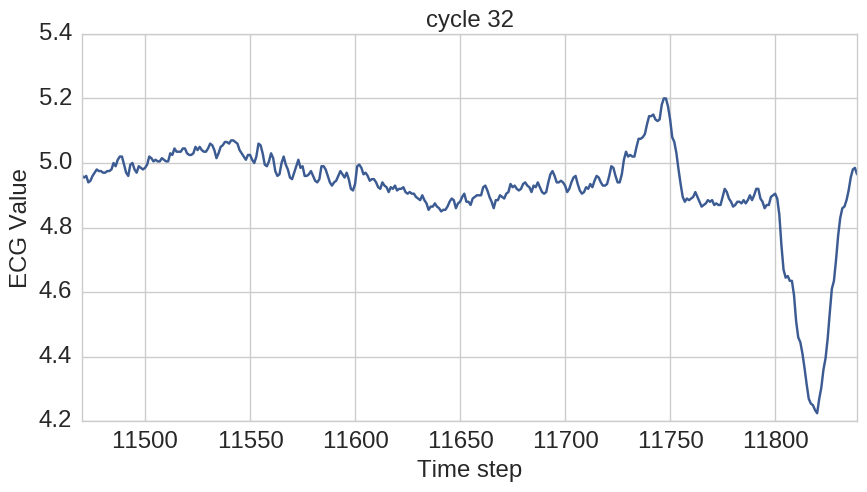

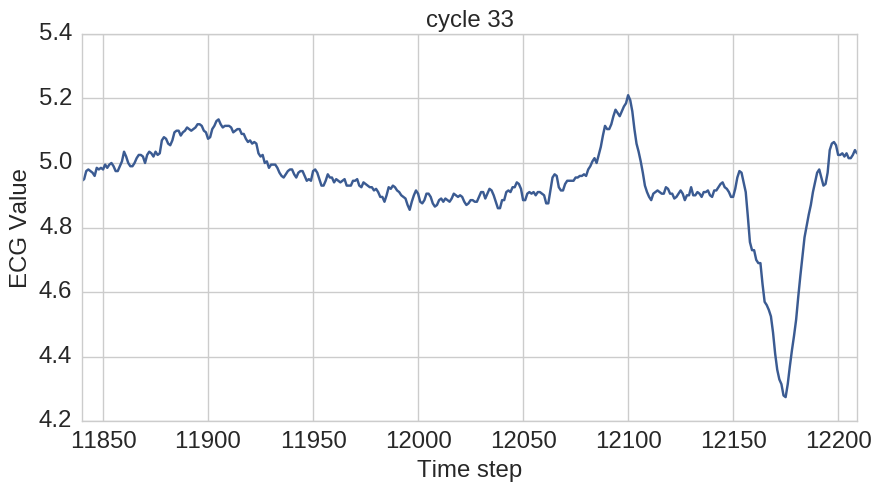

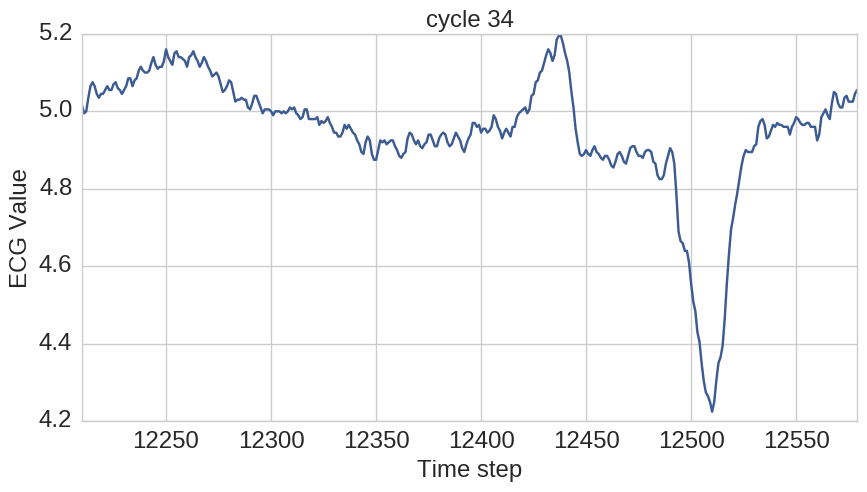

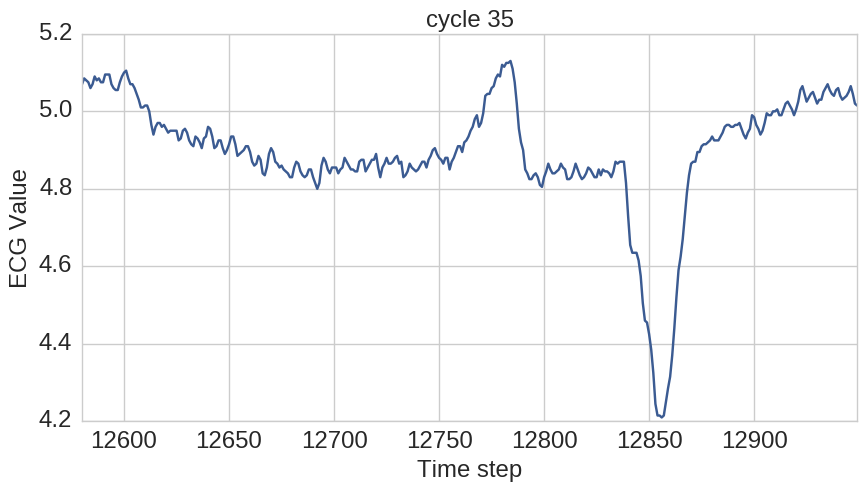

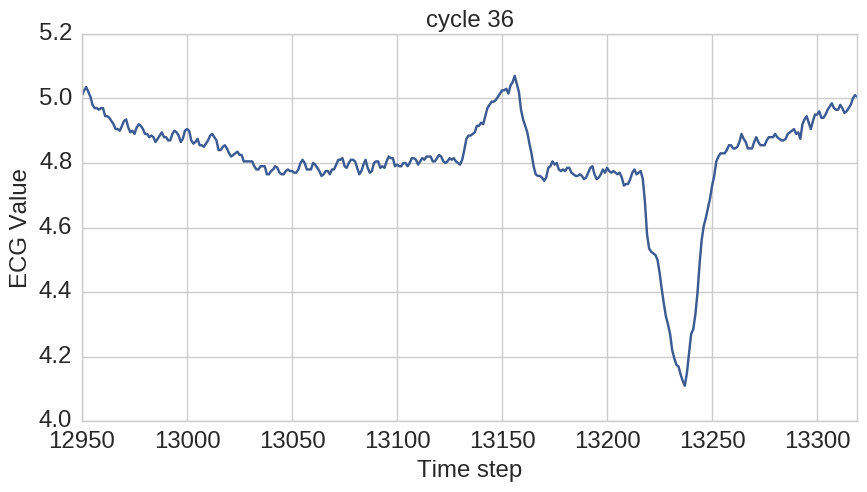

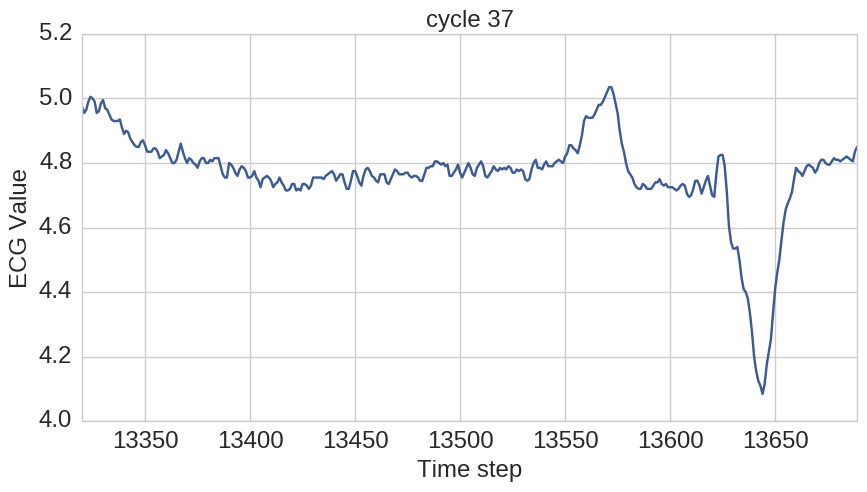

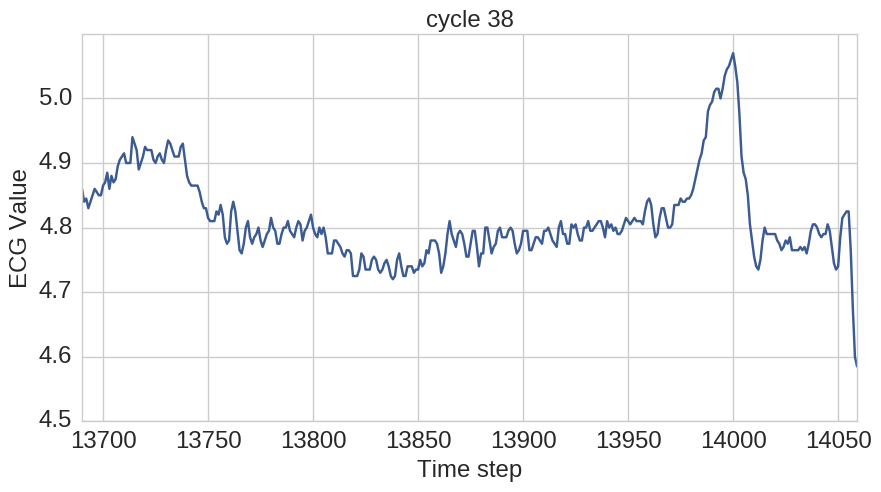

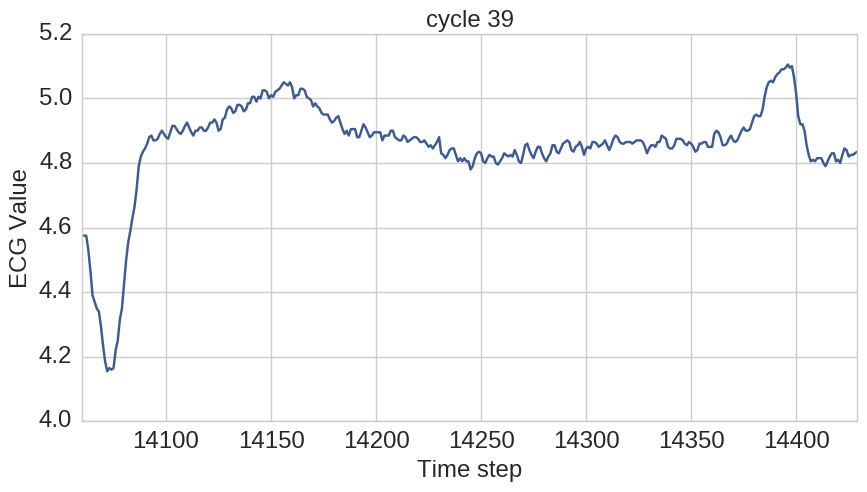

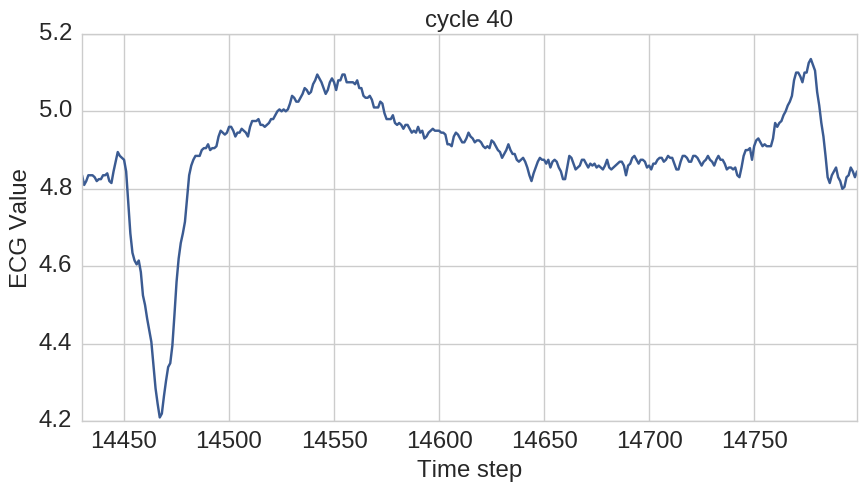

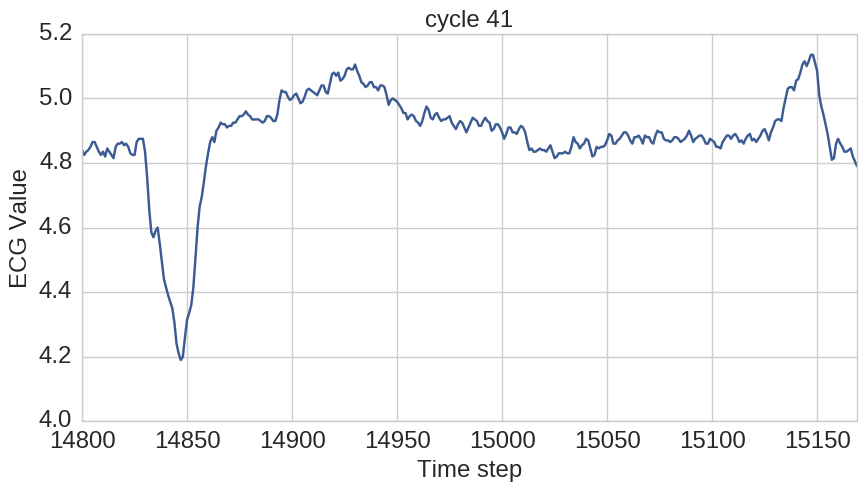

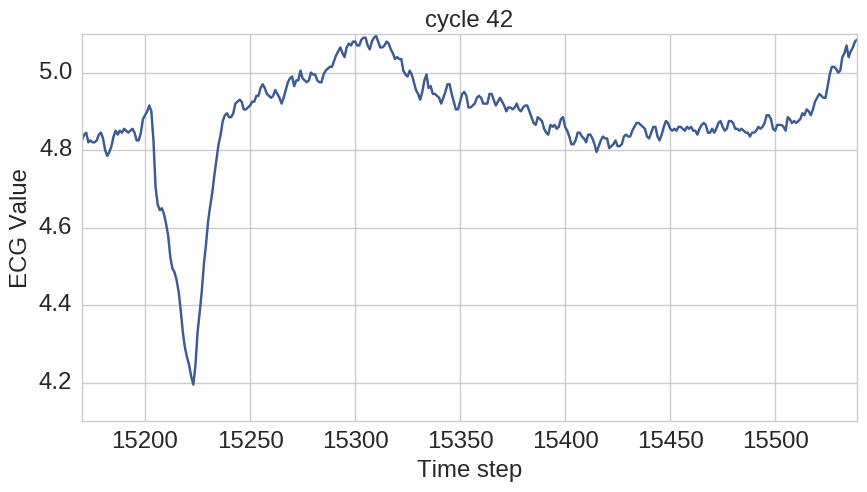

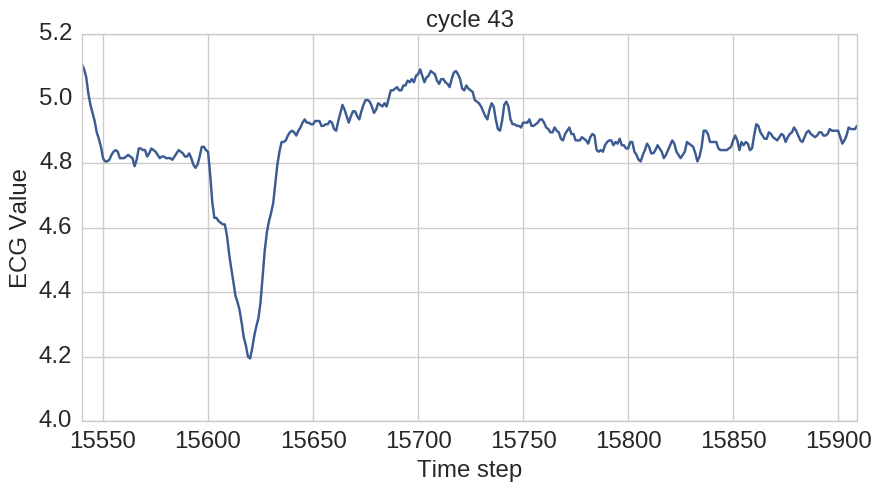

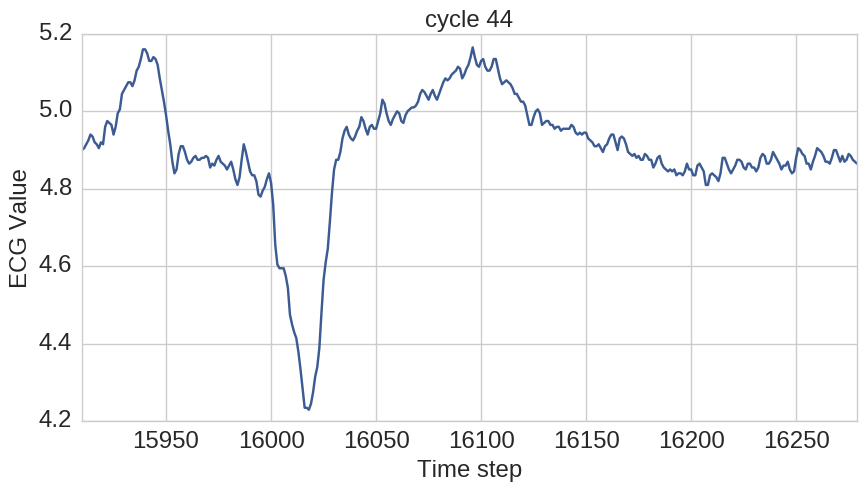

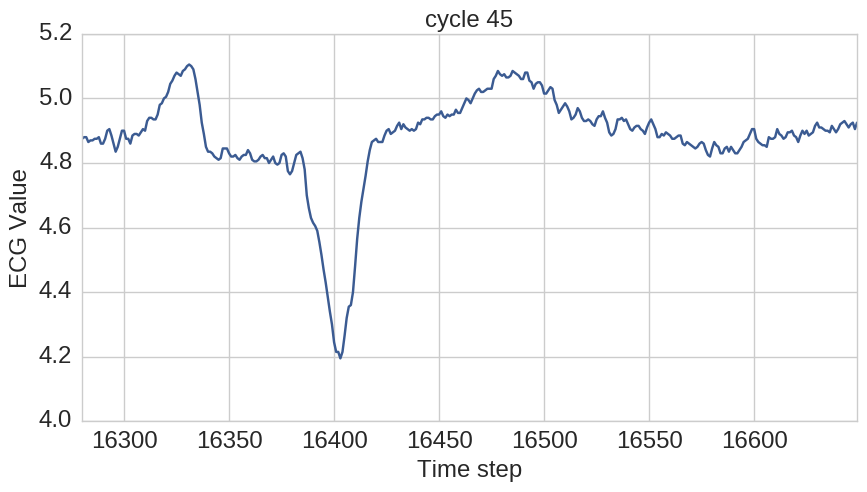

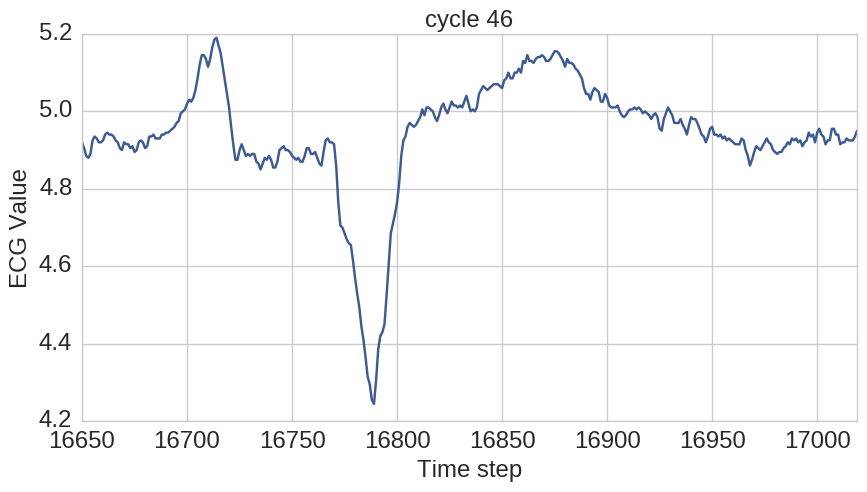

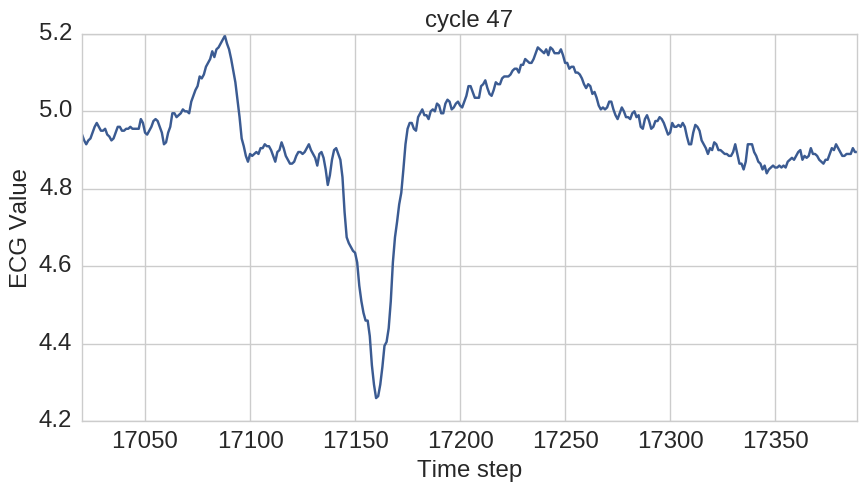

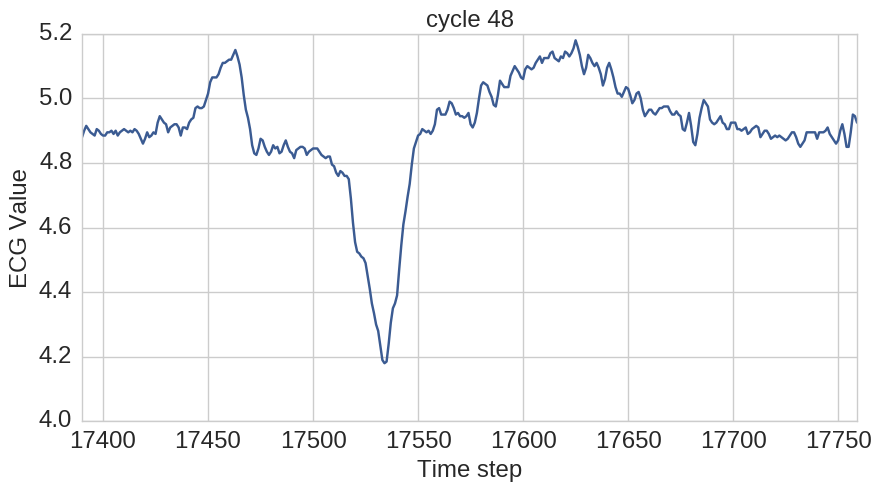

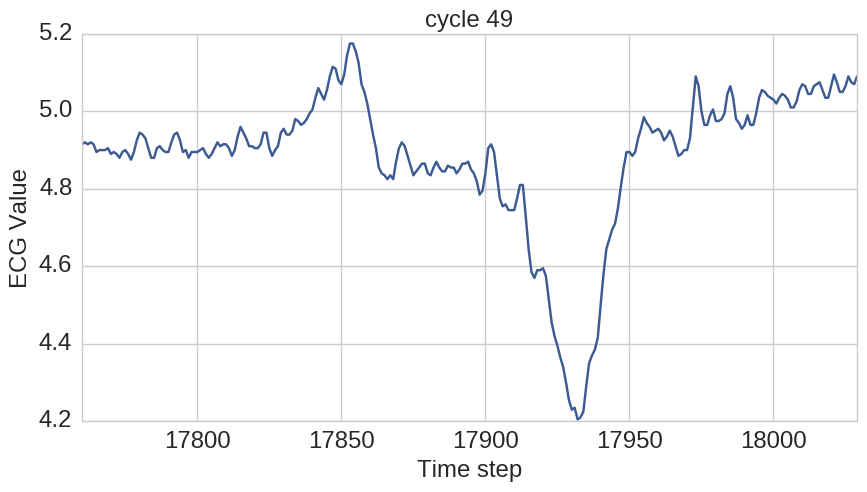

In [228]:
#iterate over a week. a week will have 672 values
step = 370

for i in range(0,df.shape[0],step):
    fig = plt.figure(figsize=(10,5))
    tmp = df[i:i+step]['col1'].plot(color=sns.xkcd_rgb["denim blue"])
    plt.title("cycle %s"%(i/step +1))
    plt.xlabel('Time step')
    plt.ylabel('ECG Value')
    plt.show()
   
    

Size of test: 4750
Size of validation1: 1320
Size of validation2: 4750
Size of train: 11960
Total: 22780
Ratio of test: 0.208516
Ratio of validation1: 0.057946
Ratio of validation2: 0.208516
Ratio of train: 0.525022


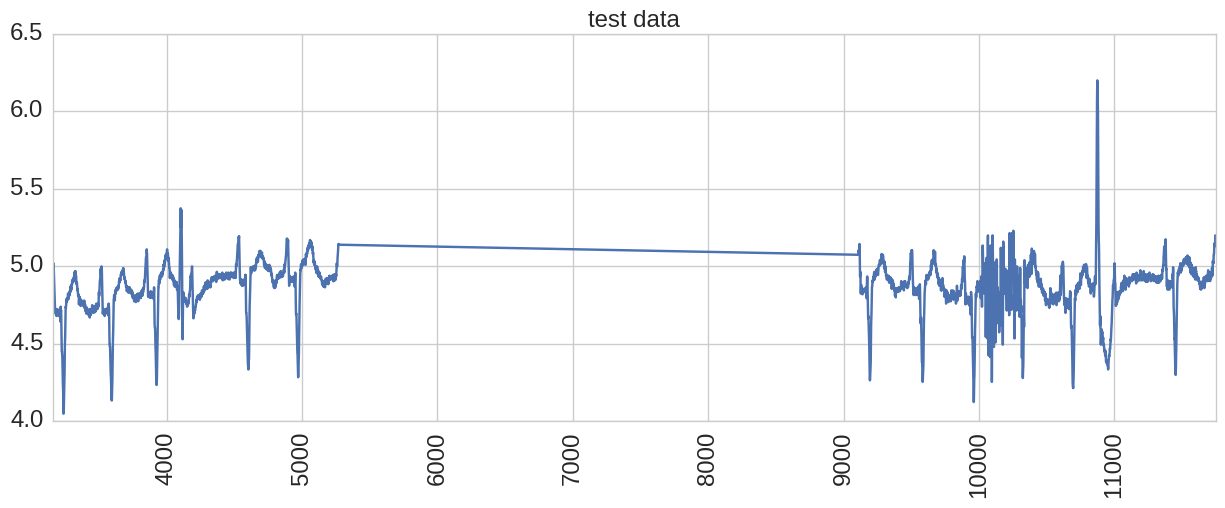

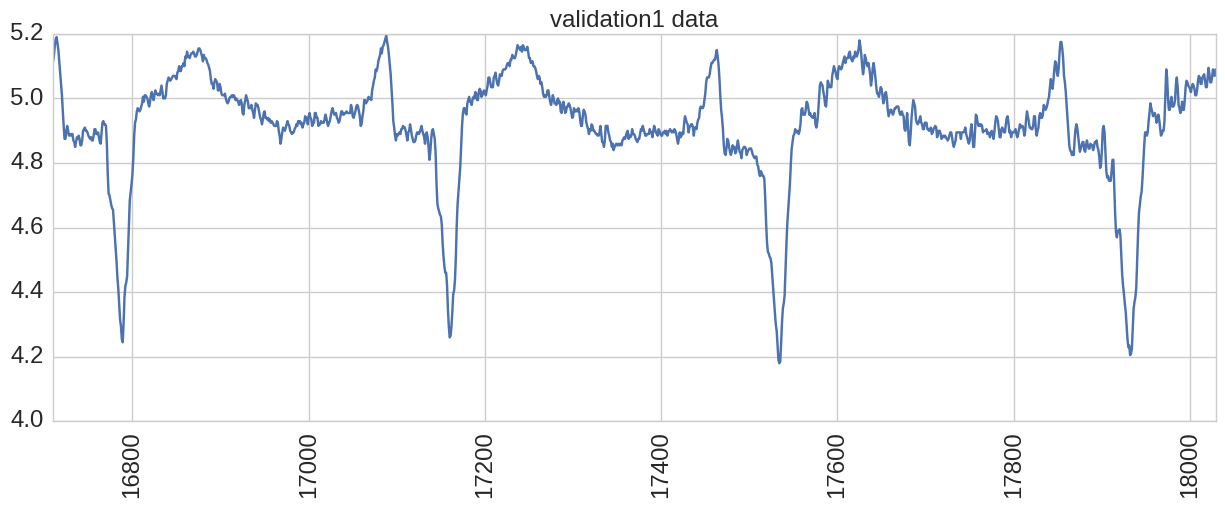

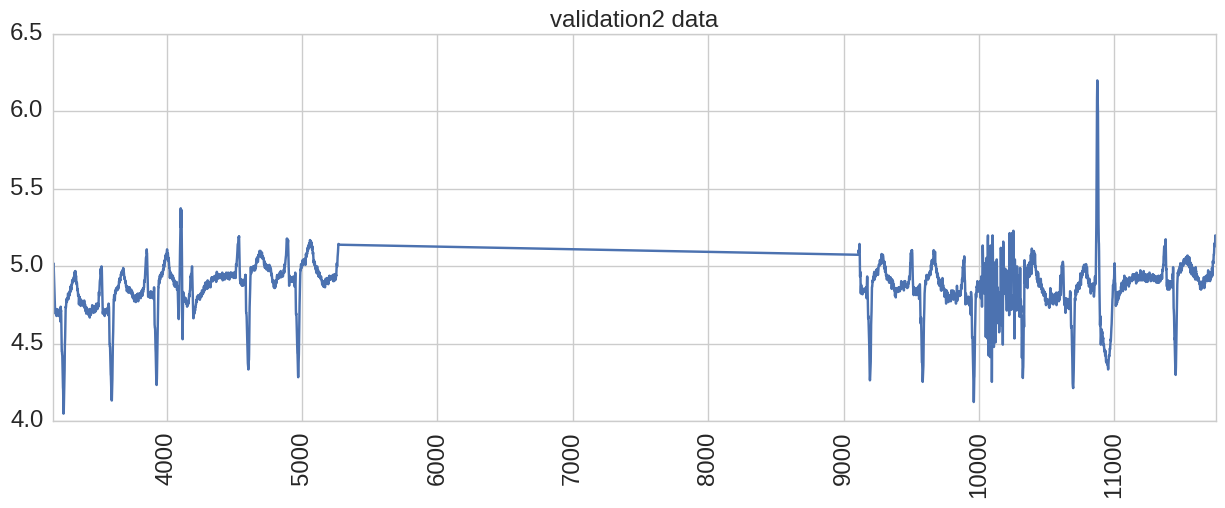

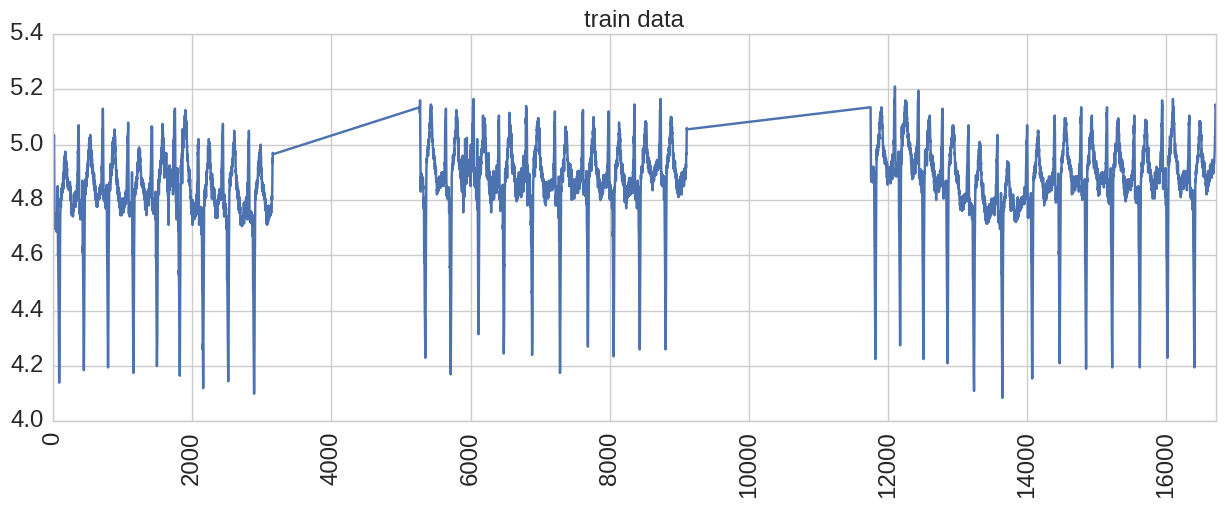

In [138]:
df_anomaly1 = df[3160:5270]
df_anomaly2 = df[9110:11750]
df_test = pd.concat([df_anomaly1,df_anomaly2])
df_validation1= df[16710:]

df_not_train = pd.concat([df_validation1,df_test])
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col1'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [139]:
for key in df_dict:
    np.save("../resources/data/discords/ECG/%s"%(key),df_dict[key])

In [155]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [156]:
data_folder = "../resources/data/discords/ECG/"

In [157]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(11616, 5)
(11616,)


In [158]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


(4719, 5)
(4719,)
(4742, 5, 1)
(4742, 5)


In [159]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(4719, 5)
(4719,)
(4742, 5)


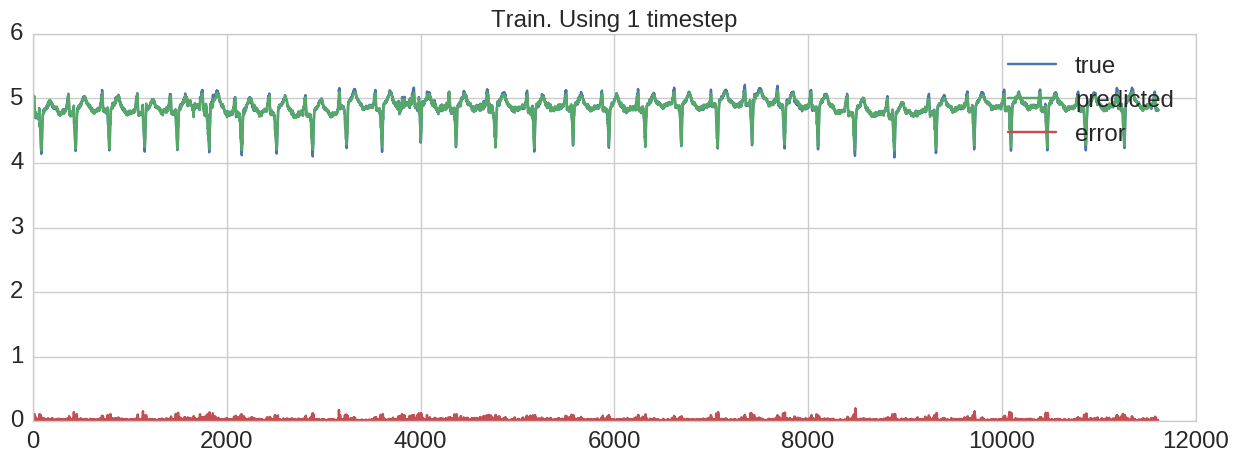

In [192]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[-0.00031612]
0.000761306892587


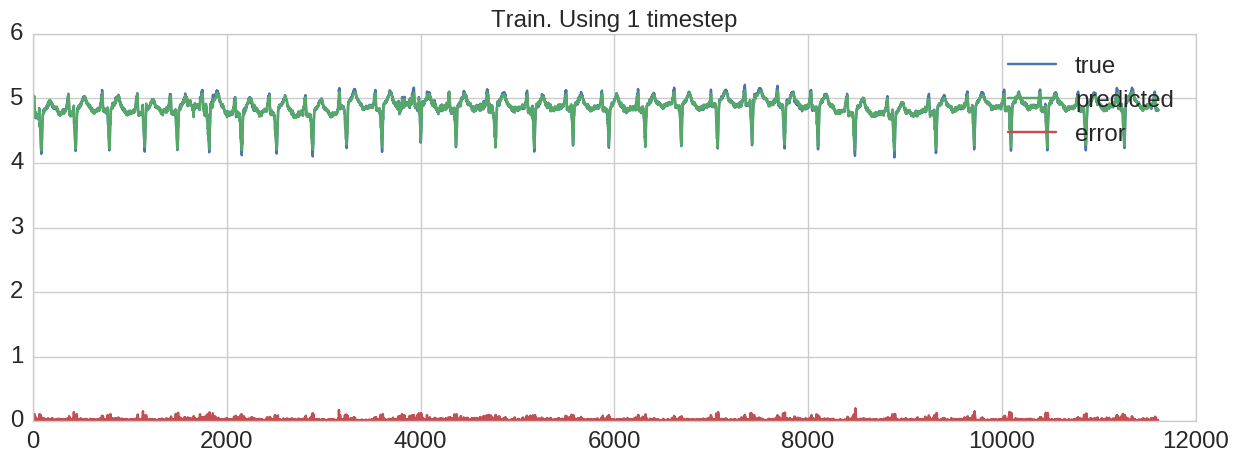

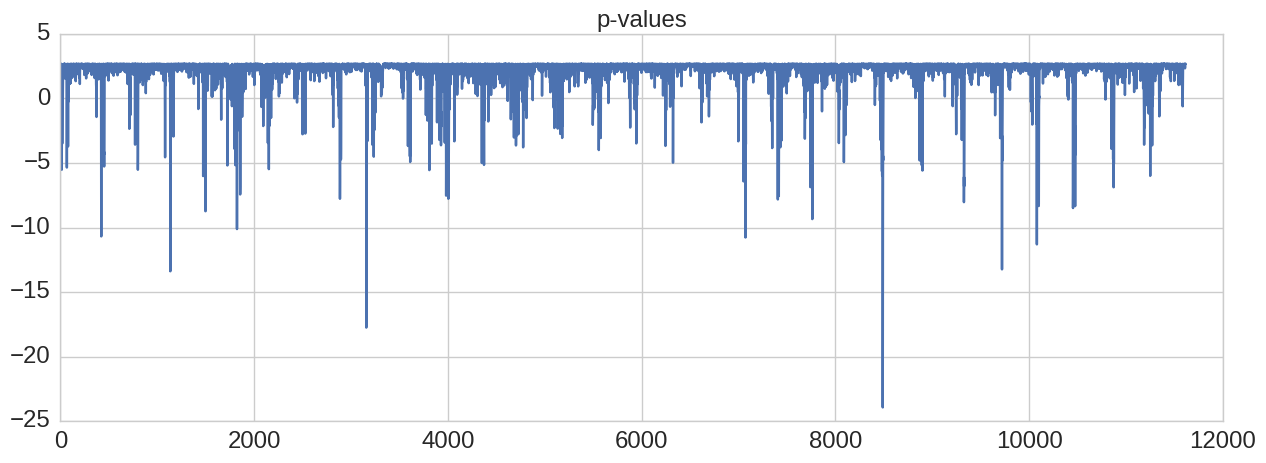

In [208]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print mean
print cov
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [209]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)

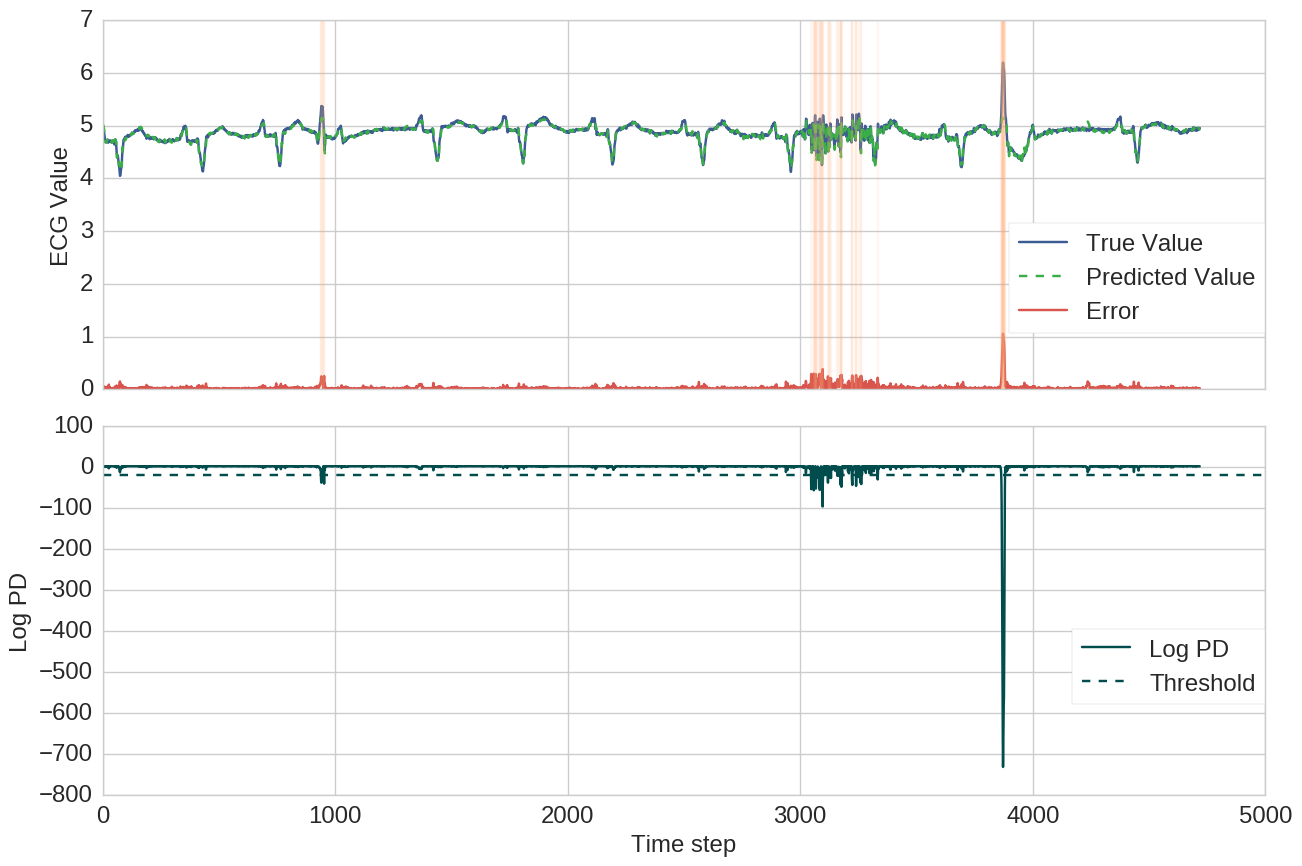

In [226]:
threshold_v2 = -20

f = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)
ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1,.45),borderaxespad=0.,frameon=True)
plt.ylabel("ECG Value")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('ECG_v2.pdf')
pp.savefig(f)
pp.close()

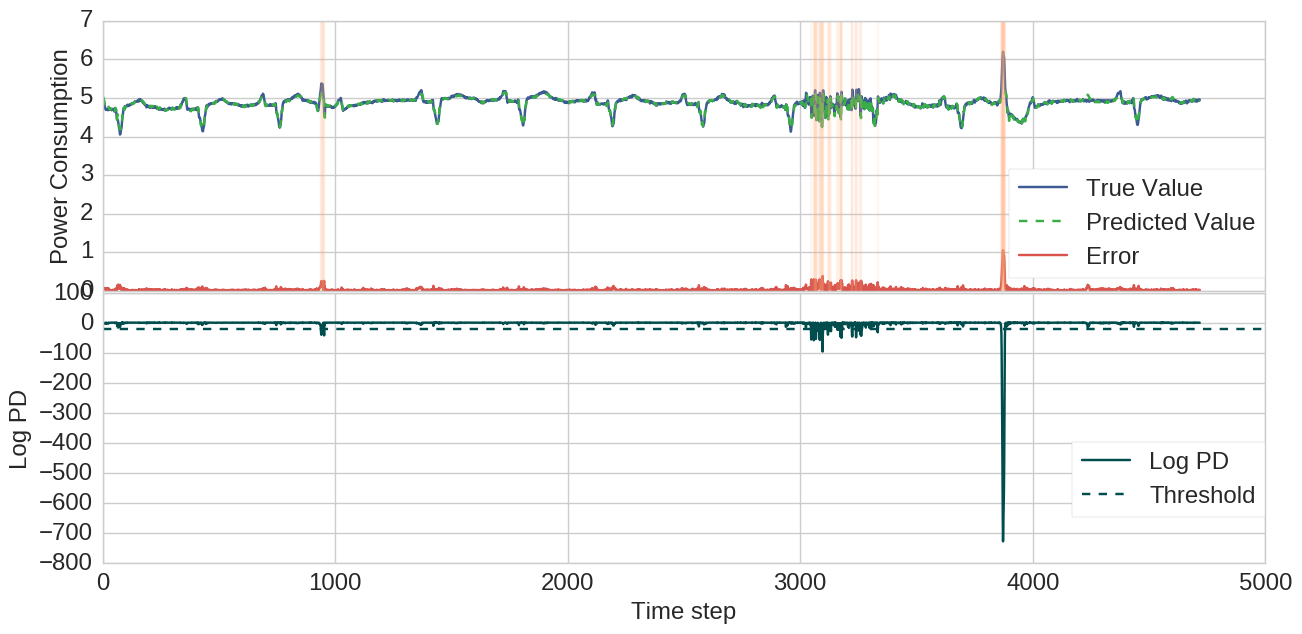

In [220]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
#plot test data
f = plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('power_test.pdf')
pp.savefig(f)
pp.close()